<a href="https://colab.research.google.com/github/bhavikaworks/Clustering1/blob/main/Online_retail_data_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Author  
**Bhavika Kaur**

* Github - https://github.com/bhavikaworks/Clustering1/blob/main/Copy_of_Online_retail_data_clustering.ipynb

#  Customer Segmentation using Clustering

##  Problem Statement
The company aims to gain deeper insights into customer behavior to create more effective, targeted marketing strategies. Since the dataset doesn’t include any predefined customer segments or labels, we’ll use **unsupervised learning** techniques to uncover natural groupings or patterns within the data. This approach will help us identify distinct customer segments based on their behavior, allowing for more personalized and strategic decision-making.


##  Objective
We’re using clustering techniques on the Online Retail dataset to group customers based on their purchasing behavior through **RFM analysis**—which looks at how recently (Recency), how often (Frequency), and how much (Monetary) a customer has spent.

By analyzing these patterns, we can identify different types of customers, such as:

* Loyal, high-value buyers
* New or occasional shoppers
* At-risk or inactive customers

This kind of segmentation will enable the business to personalize promotions, boost customer satisfaction, and ultimately drive more revenue.


---


# Import Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# 1. Load the Dataset


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Copy of Online Retail.xlsx")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [12]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


# Knowing The Dataset


Dataset Rows & Columns count

In [13]:
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns.")

The dataset has 541909 rows and 8 columns.


Dataset Information

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


Duplicate Values

In [15]:
len(df[df.duplicated()])

5268

Missing Values/Null Values

In [16]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


<Axes: >

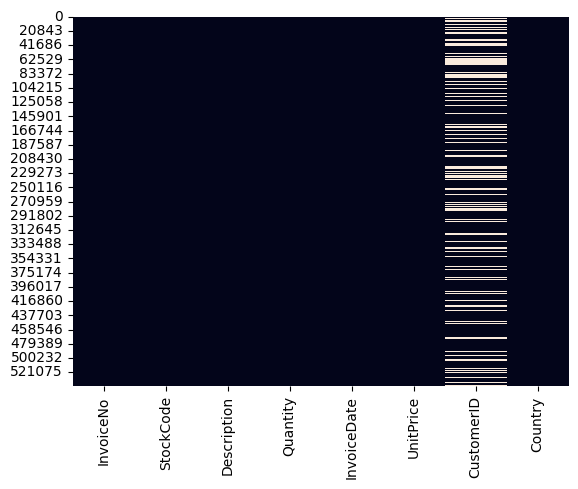

In [17]:
# Visualizing the missing values
sns.heatmap(df.isnull(), cbar=False)

# Understanding  Variables

In [18]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [19]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


##  Variable Description

| Column Name   | Description                                                                 |
|---------------|-----------------------------------------------------------------------------|
| **InvoiceNo** | Unique identifier for the invoice (transaction).                            |
| **StockCode** | Unique code for the product/item.                                           |
| **Description** | Description of the product.                                               |
| **Quantity**  | Number of items purchased for each product per invoice.                     |
| **InvoiceDate** | Date and time when the invoice was created.                              |
| **UnitPrice** | Price per unit of the product (in GBP).                                     |
| **CustomerID** | Unique identifier assigned to each customer.                              |
| **Country**   | Country where the customer resides.                                          |
| **TotalPrice** | *(Created Column)* Total amount spent per row = Quantity × UnitPrice.     |
| **Recency**   | *(RFM)* Days since the customer's last purchase.                            |
| **Frequency** | *(RFM)* Total number of purchases (invoices) made by the customer.          |
| **Monetary**  | *(RFM)* Total amount spent by the customer.                                 |
| **Cluster**   | Cluster label assigned to each customer based on RFM features.              |
| **Segment**   | Optional interpreted label for each cluster (e.g., Loyal, High-Value, etc.) |

---

>  Note: `TotalPrice`, `Recency`, `Frequency`, `Monetary`, and `Cluster` are created during the project for analysis and segmentation.


In [20]:
# Check Unique Values for each variable.
for i in df.columns:
  print(f'Number of unique values in {i} is {df[i].nunique()}')

Number of unique values in InvoiceNo is 25900
Number of unique values in StockCode is 4070
Number of unique values in Description is 4223
Number of unique values in Quantity is 722
Number of unique values in InvoiceDate is 23260
Number of unique values in UnitPrice is 1630
Number of unique values in CustomerID is 4372
Number of unique values in Country is 38


# Data Cleaning

In [21]:
#  Initial shape
print("Initial shape:", df.shape)

#  Remove duplicate rows
df.drop_duplicates(inplace=True)
print("After removing duplicates:", df.shape)

#  Remove rows with missing CustomerID
df = df[df['CustomerID'].notnull()]

# Remove rows with missing Description
df = df[df['Description'].notnull()]

# Remove rows with Quantity <= 0 or UnitPrice <= 0
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Remove cancelled transactions (InvoiceNo starting with 'C')
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]

# Create TotalPrice column
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# Convert CustomerID to string
df['CustomerID'] = df['CustomerID'].astype(str)

# Final shape after cleaning
print("Final cleaned shape:", df.shape)

# Quick check for remaining nulls
print("\nRemaining missing values:\n", df.isnull().sum())


Initial shape: (541909, 8)
After removing duplicates: (536641, 8)
Final cleaned shape: (392692, 9)

Remaining missing values:
 InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
TotalPrice     0
dtype: int64


## 🧼 Data Wrangling Summary

| Step                          | Details                                      |
|-------------------------------|----------------------------------------------|
| Initial Shape              | (541,909 rows, 8 columns)                    |
| After Removing Duplicates  | (536,641 rows, 8 columns) — 5,268 removed     |
|  Removed Rows with Nulls    | Rows without `CustomerID` and `Description` removed |
|  Removed Cancelled Orders   | Transactions with `InvoiceNo` starting with 'C' removed |
|  Removed Invalid Transactions | Rows with `Quantity <= 0` or `UnitPrice <= 0` removed |
|  Created New Column         | `TotalPrice = Quantity × UnitPrice`         |
|  Final Shape After Cleaning | (392,692 rows, 9 columns)                    |
|  Remaining Missing Values   | **0** in all columns                         |

>  The dataset is now clean and ready for **RFM analysis** and **clustering**.


# Exploratory Data Analysis (EDA)

## 1. Top 10 Countries by Number of Transactions

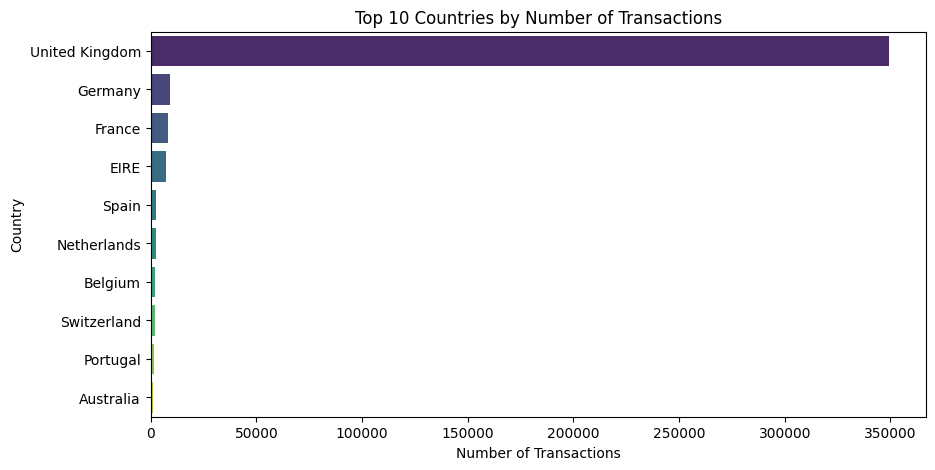

In [22]:
top_countries = df['Country'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_countries.values, y=top_countries.index, palette="viridis")
plt.title("Top 10 Countries by Number of Transactions")
plt.xlabel("Number of Transactions")
plt.ylabel("Country")
plt.show()



## 2. Distribution of Unit Price

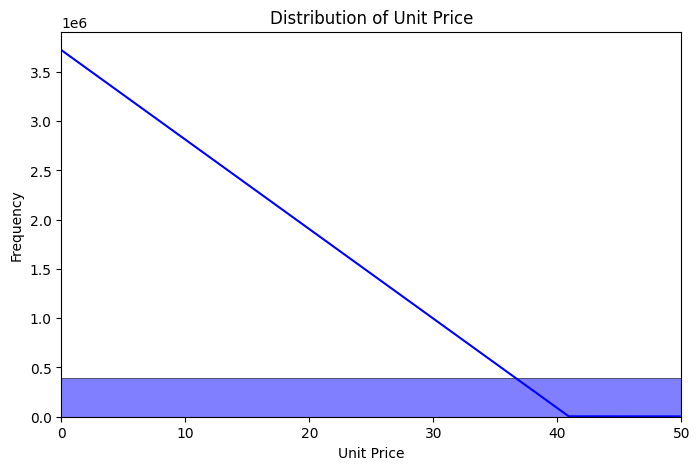

In [23]:
plt.figure(figsize=(8,5))
sns.histplot(df['UnitPrice'], bins=100, kde=True, color='blue')
plt.title("Distribution of Unit Price")
plt.xlabel("Unit Price")
plt.ylabel("Frequency")
plt.xlim(0, 50)  # Limiting for better visibility
plt.show()


## 3. Boxplots to Detect Outliers

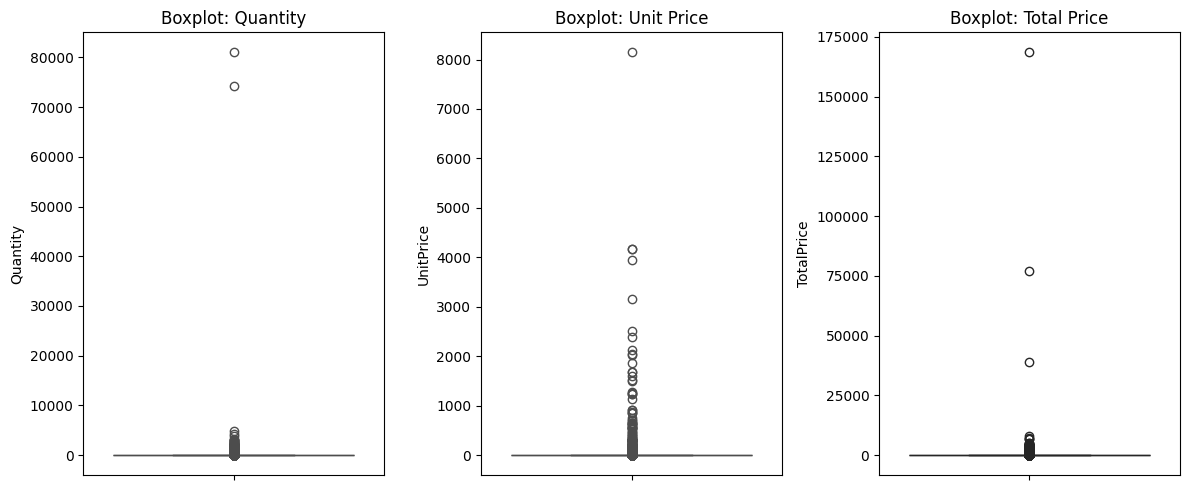

In [25]:
plt.figure(figsize=(12,5))

plt.subplot(1, 3, 1)
sns.boxplot(y=df['Quantity'], color='orange')
plt.title("Boxplot: Quantity")

plt.subplot(1, 3, 2)
sns.boxplot(y=df['UnitPrice'], color='red')
plt.title("Boxplot: Unit Price")

plt.subplot(1, 3, 3)
sns.boxplot(y=df['TotalPrice'], color='green')
plt.title("Boxplot: Total Price")

plt.tight_layout()
plt.show()


## 4. Correlation Heatmap

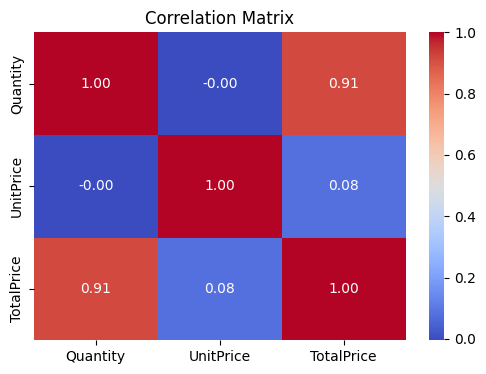

In [27]:
plt.figure(figsize=(6,4))
sns.heatmap(df[['Quantity', 'UnitPrice', 'TotalPrice']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()


## 5.Top 10 Most Purchased Products

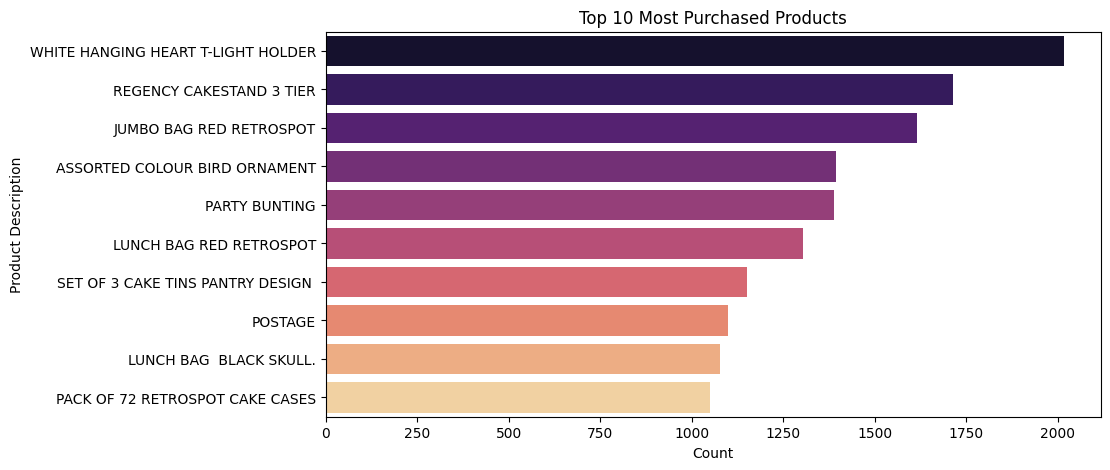

In [28]:
top_products = df['Description'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_products.values, y=top_products.index, palette="magma")
plt.title("Top 10 Most Purchased Products")
plt.xlabel("Count")
plt.ylabel("Product Description")
plt.show()


# RFM Feature Engineering

In [29]:
# Set reference date for Recency calculation
NOW = df['InvoiceDate'].max() + pd.Timedelta(days=1)

#  Group by CustomerID and calculate R, F, M
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (NOW - x.max()).days,   # Recency
    'InvoiceNo': 'nunique',                          # Frequency
    'TotalPrice': 'sum'                              # Monetary
})

# Rename columns
rfm.columns = ['Recency', 'Frequency', 'Monetary']

# Reset index
rfm = rfm.reset_index()

rfm.head()


,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,1,77183.60
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,19,1,1757.55
4,12350.0,310,1,334.40


## Handling Outliers

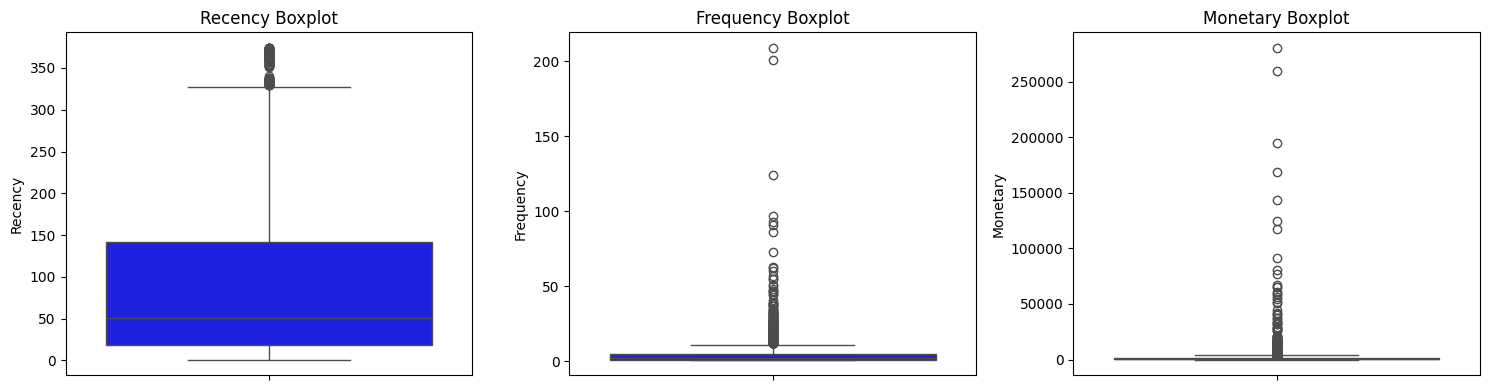

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 4))

for i, col in enumerate(['Recency', 'Frequency', 'Monetary']):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y=rfm[col], color='blue')
    plt.title(f'{col} Boxplot')

plt.tight_layout()
plt.show()


In [31]:
def cap_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower, upper)

for col in ['Recency', 'Frequency', 'Monetary']:
    cap_outliers(rfm, col)


In [32]:
# Log Transform
rfm['Recency_log'] = np.log1p(rfm['Recency'])
rfm['Frequency_log'] = np.log1p(rfm['Frequency'])
rfm['Monetary_log'] = np.log1p(rfm['Monetary'])


rfm_log = rfm[['Recency_log', 'Frequency_log', 'Monetary_log']]


## Standard Scaling

In [33]:
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_log)


Dendrogram

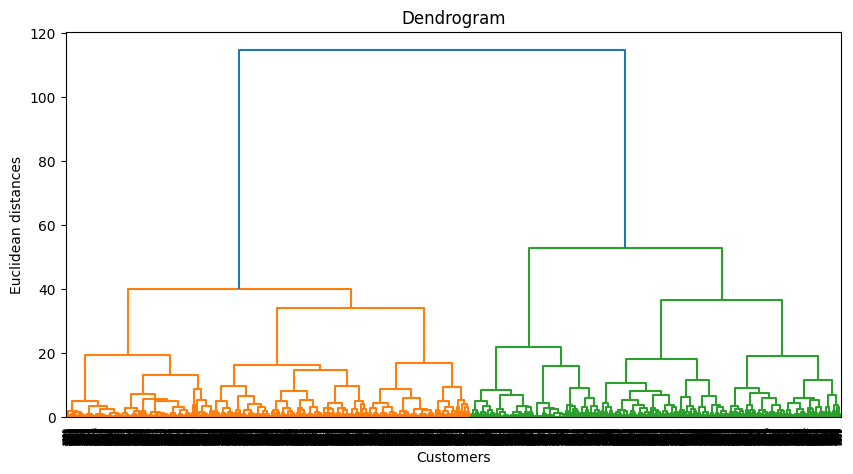

In [34]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(10, 5))
dendrogram = sch.dendrogram(sch.linkage(rfm_scaled, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()


Elbow Method

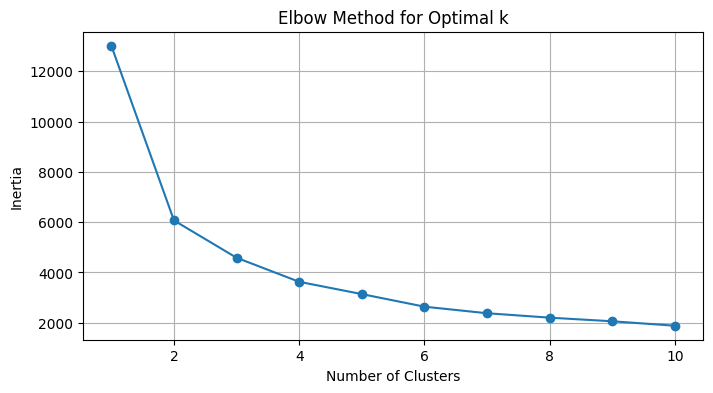

In [35]:
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(rfm_scaled)  # rfm_scaled should be your scaled RFM data
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 4))
plt.plot(K, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


### <b> The number of clusters will be the number of vertical lines which are being intersected by the line drawn using the threshold. </b>

### No. of Cluster  = 5

In [36]:
from sklearn.cluster import AgglomerativeClustering

In [37]:
hc = AgglomerativeClustering(n_clusters = 4,linkage = 'ward')
y_hc = hc.fit_predict(rfm_log)

In [38]:
y_hc

array([1, 0, 0, ..., 2, 0, 0])

In [39]:
rfm_log['aglo_label'] = y_hc
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [40]:
x = rfm_log[['Recency_log', 'Frequency_log', 'Monetary_log']].values  # NumPy array


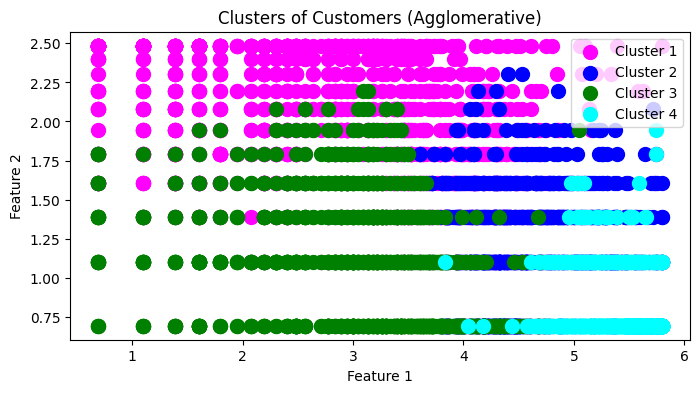

In [43]:
plt.figure(figsize = (8, 4))
plt.scatter(x[y_hc == 0, 0], x[y_hc == 0, 1], s = 100, c = 'magenta', label = 'Cluster 1')
plt.scatter(x[y_hc == 1, 0], x[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y_hc == 2, 0], x[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(x[y_hc == 3, 0], x[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.title('Clusters of Customers (Agglomerative)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


### **KMeans Clustring**

In [44]:
kmeans = KMeans(n_clusters = 5)
y_kmeans = kmeans.fit_predict(x)

In [45]:
y_kmeans

array([1, 2, 0, ..., 3, 2, 0], dtype=int32)

In [46]:
rfm_log['kmeans_label'] = y_kmeans
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


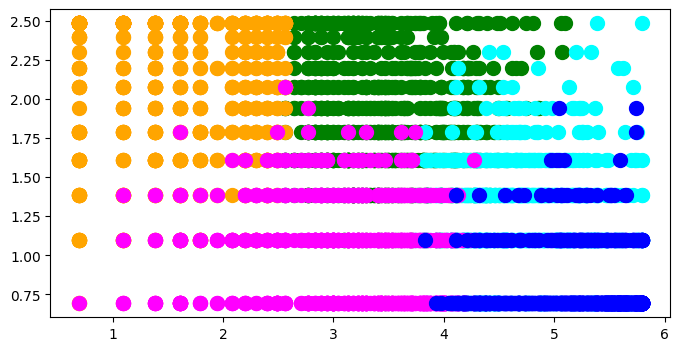

In [47]:
label = rfm_log['kmeans_label']

plt.figure(figsize = (8, 4))
plt.scatter(x[label == 0, 0], x[label == 0, 1], s = 100, c = 'green', label = 'Cluster 1')
plt.scatter(x[label == 1, 0], x[label == 1,1], s = 100, c = 'cyan',label = 'Cluster 2')
plt.scatter(x[label == 2, 0], x[label == 2,1], s = 100, c = 'orange',label = 'Cluster 3')
plt.scatter(x[label == 3, 0], x[label == 3,1], s = 100, c = 'magenta',label = 'Cluster 4')
plt.scatter(x[label == 4, 0], x[label == 4,1], s = 100, c = 'blue',label = 'Cluster 5')

## Conclusion

In this project, we carried out **customer segmentation** using **RFM analysis** (Recency, Frequency, Monetary) on the Online Retail dataset. After cleaning the data and creating relevant features, we applied log transformation and scaling to make it suitable for clustering.

We used two clustering techniques:

* **KMeans Clustering**
* **Agglomerative Hierarchical Clustering**

Using the Elbow Method and Dendrogram, we found that **4 clusters** gave the best results. These clusters gave us clear insights into different types of customers:

* **Cluster 0:** Customers who buy often and spend a lot — likely **loyal or premium customers**
* **Cluster 1:** Customers who haven’t purchased in a long time and buy infrequently — likely **inactive or churned**
* **Cluster 2:** Customers who recently made a purchase but not often — likely **new or one-time buyers**
* **Cluster 3:** Customers with average values in all aspects — **potentially loyal** if nurtured properly

This kind of segmentation can help businesses take smarter actions:

* Reward and retain loyal customers
* Bring back inactive users with targeted offers
* Encourage new buyers to return and build loyalty